In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

print("imported.")

imported.


In [2]:
BTC_Ticker = yf.Ticker("BTC-EUR")
BTC_Data = BTC_Ticker.history(period="10y")

CNY_Ticker = yf.Ticker("CNYEUR=X")
CNY_Data = CNY_Ticker.history(period="10y")

print("data collected.")

data collected.


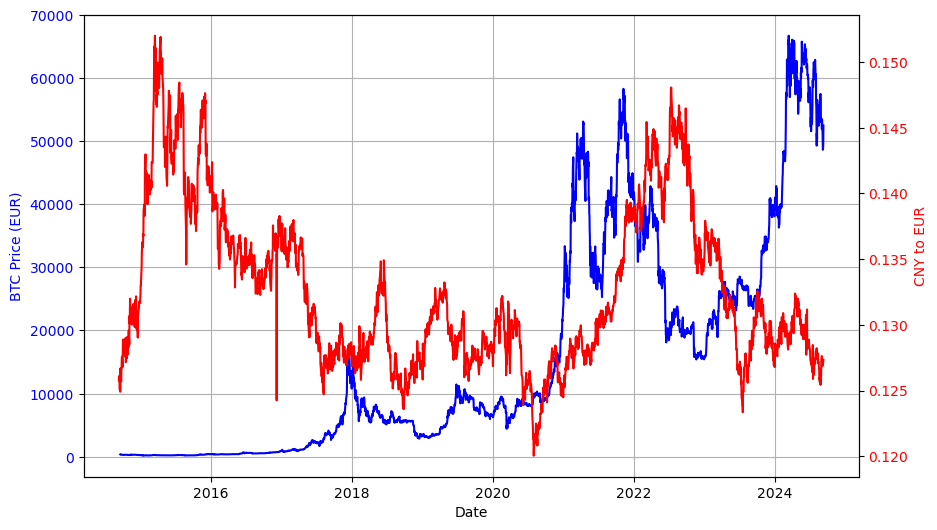

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(BTC_Data.index, BTC_Data['Close'], label='BTC Closing Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (EUR)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(CNY_Data.index, CNY_Data['Close'], label='CNY Closing Price', color='red')
ax2.set_ylabel('CNY to EUR', color='red')
ax2.tick_params(axis='y', labelcolor='red')


ax1.grid(True)
plt.show()

In [4]:
eur_per_day = 1

BTC_Data_1y_1d = BTC_Ticker.history(period="1y", interval="1d")

BTC_Data_1y_1d['BTC_Bought'] = eur_per_day / BTC_Data['Close']

total_btc_accumulated = BTC_Data_1y_1d['BTC_Bought'].sum()
total_eur_spent = 365  # 1 EUR per day 365 days

avg_cost_1y_1d = total_eur_spent / total_btc_accumulated

print(f"Total BTC accumulated: {total_btc_accumulated:.6f}")
print(f"Average cost per BTC: {avg_cost_1y_1d:.2f} EUR")

Total BTC accumulated: 0.008384
Average cost per BTC: 43533.06 EUR


In [5]:
eur_per_hour = eur_per_day / 24

BTC_Data_1y_1d = BTC_Ticker.history(period="1y", interval="1h")

BTC_Data_1y_1d['EUR_Spent'] = eur_per_hour
BTC_Data_1y_1d['BTC_Bought'] = BTC_Data_1y_1d['EUR_Spent'] / BTC_Data_1y_1d['Close']  

# Calculate total BTC accumulated for hourly buys and total EUR spent
total_btc_accumulated_hourly = BTC_Data_1y_1d['BTC_Bought'].sum()
total_eur_spent_hourly = eur_per_hour * len(BTC_Data_1y_1d)

avg_cost_1y_1h = total_eur_spent_hourly / total_btc_accumulated_hourly

print(f"Total BTC accumulated: {total_btc_accumulated:.6f}")
print(f"Average cost per BTC: {avg_cost_1y_1h:.2f} EUR")


Total BTC accumulated: 0.008384
Average cost per BTC: 43892.60 EUR


In [6]:
eur_per_week = 7
eur_per_month = 30

# Fetch weekly data for the past year
BTC_Data_1y_1w = BTC_Ticker.history(period="1y", interval="1wk")

# Fetch monthly data for the past year
BTC_Data_1y_1m = BTC_Ticker.history(period="1y", interval="1mo")

# Calculate how much BTC is bought each week for 7 EUR
BTC_Data_1y_1w['BTC_Bought'] = eur_per_week / BTC_Data_1y_1w['Close']

# Calculate how much BTC is bought each month for 30 EUR
BTC_Data_1y_1m['BTC_Bought'] = eur_per_month / BTC_Data_1y_1m['Close']

# Calculate total BTC accumulated and total EUR spent for weekly purchases
total_btc_accumulated_weekly = BTC_Data_1y_1w['BTC_Bought'].sum()
total_eur_spent_weekly = eur_per_week * len(BTC_Data_1y_1w)

# Calculate total BTC accumulated and total EUR spent for monthly purchases
total_btc_accumulated_monthly = BTC_Data_1y_1m['BTC_Bought'].sum()
total_eur_spent_monthly = eur_per_month * len(BTC_Data_1y_1m)

# Calculate the average cost per BTC for weekly and monthly buys
avg_cost_1y_1w = total_eur_spent_weekly / total_btc_accumulated_weekly
avg_cost_1y_1m = total_eur_spent_monthly / total_btc_accumulated_monthly

# Output the results
print(f"Total BTC accumulated (Weekly): {total_btc_accumulated_weekly:.6f}")
print(f"Average cost per BTC (Weekly): {avg_cost_1y_1w:.2f} EUR")

print(f"Total BTC accumulated (Monthly): {total_btc_accumulated_monthly:.6f}")
print(f"Average cost per BTC (Monthly): {avg_cost_1y_1m:.2f} EUR")


Total BTC accumulated (Weekly): 0.008682
Average cost per BTC (Weekly): 43536.10 EUR
Total BTC accumulated (Monthly): 0.007452
Average cost per BTC (Monthly): 48309.51 EUR


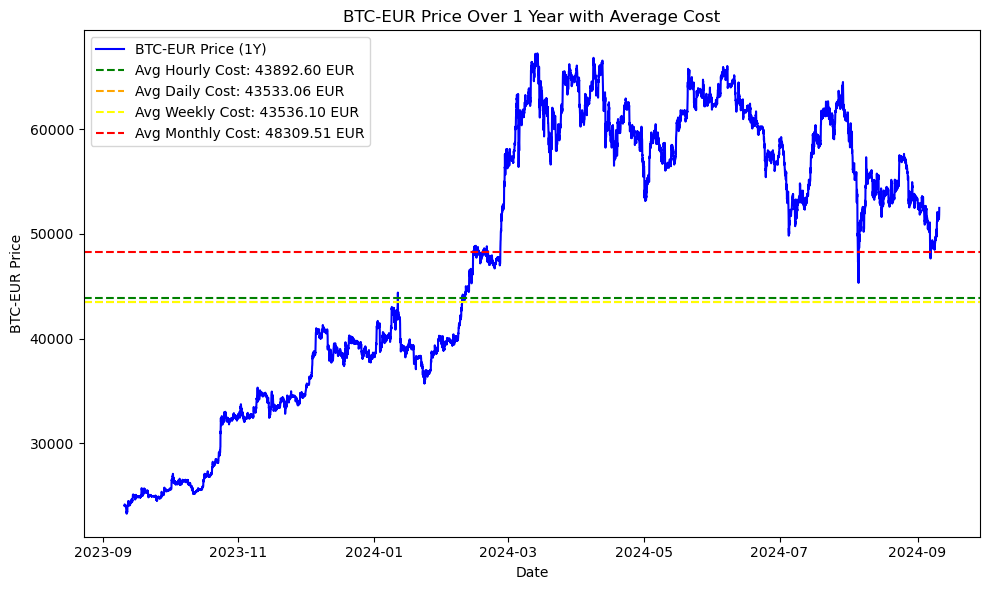

In [74]:
plt.figure(figsize=(10,6))
plt.plot(BTC_Data_1y_1d.index, BTC_Data_1y_1d['Close'], label='BTC-EUR Price (1Y)', color='blue')

plt.axhline(y=avg_cost_1y_1h, color='green', linestyle='--', label=f'Avg Hourly Cost: {avg_cost_1y_1h:.2f} EUR')
plt.axhline(y=avg_cost_1y_1d, color='orange', linestyle='--', label=f'Avg Daily Cost: {avg_cost_1y_1d:.2f} EUR')
plt.axhline(y=avg_cost_1y_1w, color='yellow', linestyle='--', label=f'Avg Weekly Cost: {avg_cost_1y_1w:.2f} EUR')
plt.axhline(y=avg_cost_1y_1m, color='red', linestyle='--', label=f'Avg Monthly Cost: {avg_cost_1y_1m:.2f} EUR')

plt.title('BTC-EUR Price Over 1 Year with Average Cost')
plt.xlabel('Date')
plt.ylabel('BTC-EUR Price')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/zm/m96r0q8s0sn2krvg5xn10_qr0000gn/T/ipykernel_25888/4156265976.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  market_open_length_week = len(stock_data.index.to_period('W').unique())
/var/folders/zm/m96r0q8s0sn2krvg5xn10_qr0000gn/T/ipykernel_25888/4156265976.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  market_open_length_month = len(stock_data.index.to_period('M').unique())


8484 356 52 12
Average Costs:
Hourly: $25937.39
Daily: $25915.97
Weekly: $25981.69
Monthly: $24794.91


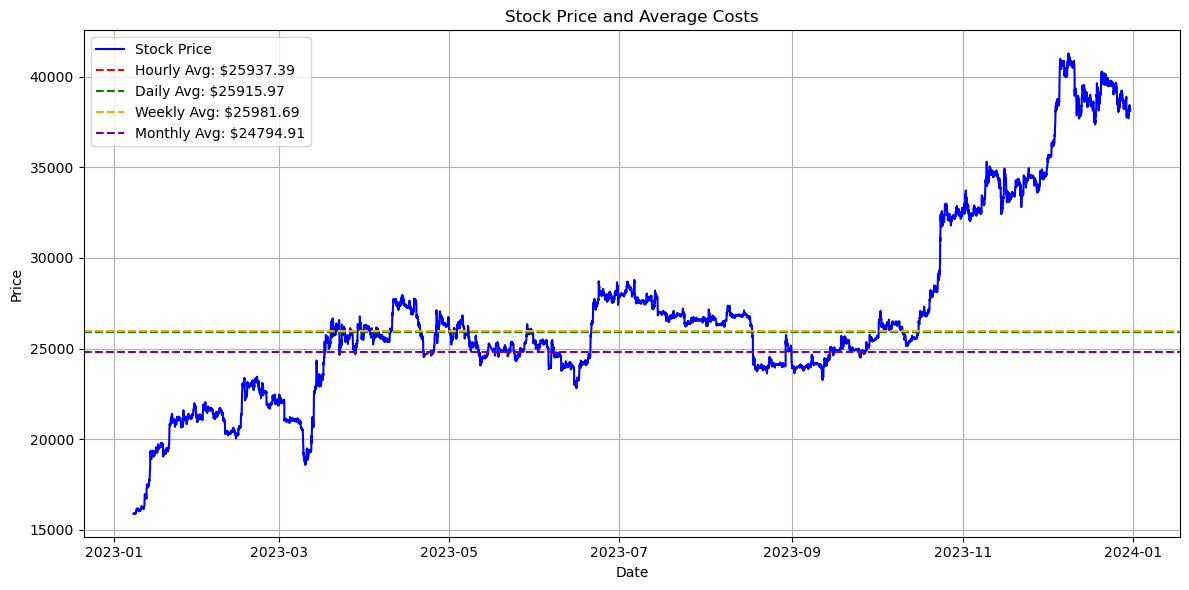

In [141]:
#not correct

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

def get_data(ticker, start_date, end_date, interval="1h"):
    data = yf.Ticker(ticker).history(start=start_date, end=end_date, interval=interval)
    if data.index.tz is None:
        data.index = data.index.tz_localize('UTC')
    else:
        data.index = data.index.tz_convert('UTC')
    return data

def convert_eur_to_usd(amount, timestamp, forex_data):
    # Ensure timestamp is in the same timezone as forex_data index
    timestamp = pd.Timestamp(timestamp).tz_convert(forex_data.index.tz)
    exchange_rate = forex_data.loc[timestamp, 'Close']
    return amount * exchange_rate

def calculate_average_cost(stock_data, forex_data, spend_eur, time_length):
    # Initialize
    start_date = pd.Timestamp(stock_data.index[0].date())  # Ensure start_date is a Timestamp
    end_date = start_date + timedelta(days=time_length)
    
    market_open_length_hour = len(stock_data.index)
    unique_days = {timestamp.date() for timestamp in stock_data.index}    
    market_open_length_day = len(unique_days)
    market_open_length_week = len(stock_data.index.to_period('W').unique())
    market_open_length_month = len(stock_data.index.to_period('M').unique())
    print(market_open_length_hour, market_open_length_day, market_open_length_week, market_open_length_month)

    # Globals
    global hourly_purchases, daily_purchases, weekly_purchases, monthly_purchases
    hourly_purchases = []
    daily_purchases = []
    weekly_purchases = []
    monthly_purchases = []

    current_date = start_date
    weekly_purchases_flag = 0
    monthly_purchases_flag = 0

    while current_date <= end_date:
        # Hourly purchase
        for hour in range(0, 24):  # Assuming market hours 9 AM to 4 PM NY TIME
            timestamp = pd.Timestamp(current_date.year, current_date.month, current_date.day, hour, 0, tz='UTC')
            timestamp_forex = pd.Timestamp(current_date.year, current_date.month, current_date.day, hour, 0, tz='UTC')
            if timestamp in stock_data.index and timestamp_forex in forex_data.index:
                usd_amount = convert_eur_to_usd(spend_eur, timestamp_forex, forex_data)
                price = stock_data.loc[timestamp, 'Close']
                shares = usd_amount / market_open_length_hour / price
                hourly_purchases.append((timestamp, shares, price))
        
        # Daily purchase
        daily_timestamp = pd.Timestamp(current_date.year, current_date.month, current_date.day, 16, 0, tz='UTC')
        daily_timestamp_forex = pd.Timestamp(current_date.year, current_date.month, current_date.day, 16, 0, tz='UTC')
        if daily_timestamp in stock_data.index and daily_timestamp_forex in forex_data.index:
            usd_amount = convert_eur_to_usd(spend_eur, daily_timestamp_forex, forex_data)
            daily_data = stock_data.loc[daily_timestamp]
            daily_close = daily_data['Close']
            daily_shares = usd_amount / market_open_length_day / daily_close
            daily_purchases.append((daily_timestamp, daily_shares, daily_close))
        
        # Weekly purchase (every Wednesday)
        if current_date.weekday() == 2 or weekly_purchases_flag == 1:  # Wednesday
            if daily_timestamp in stock_data.index and daily_timestamp_forex in forex_data.index:
                usd_amount = convert_eur_to_usd(spend_eur, daily_timestamp_forex, forex_data)
                weekly_data = stock_data.loc[daily_timestamp]
                weekly_close = weekly_data['Close']
                weekly_shares = usd_amount / market_open_length_week / weekly_close
                weekly_purchases.append((daily_timestamp, weekly_shares, weekly_close))
                weekly_purchases_flag = 0
            else: 
                weekly_purchases_flag = 1
        
        # Monthly purchase
        if current_date.day >= 8 and current_date.day <= 14 or monthly_purchases_flag == 1:
            if daily_timestamp in stock_data.index and daily_timestamp_forex in forex_data.index:
                usd_amount = convert_eur_to_usd(spend_eur, daily_timestamp_forex, forex_data)
                monthly_data = stock_data.loc[daily_timestamp]
                monthly_close = monthly_data['Close']
                monthly_shares = usd_amount / market_open_length_month / monthly_close
                monthly_purchases.append((daily_timestamp, monthly_shares, monthly_close))
                monthly_purchases_flag = 0
            else:
                monthly_purchases_flag = 1

        
        current_date += timedelta(days=1)
    
    return {
        'hourly': calculate_avg(hourly_purchases),
        'daily': calculate_avg(daily_purchases),
        'weekly': calculate_avg(weekly_purchases),
        'monthly': calculate_avg(monthly_purchases)
    }

def calculate_avg(purchases):
    if not purchases:
        return 0
    
    total_shares = sum(shares for _, shares, _ in purchases)
    total_cost = sum(shares * price for _, shares, price in purchases)
    
    return total_cost / total_shares if total_shares > 0 else 0

def plot_results(data, avg_costs):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Stock Price', color='blue')
    
    # Define a list of colors for the average cost lines
    colors = ['red', 'green', 'orange', 'purple', 'brown']
    
    # Plot each average cost line with a different color
    for (i, (method, avg_cost)) in enumerate(avg_costs.items()):
        color = colors[i % len(colors)]  # Cycle through the colors list
        plt.axhline(y=avg_cost, linestyle='--', color=color, label=f'{method.capitalize()} Avg: ${avg_cost:.2f}')
    
    plt.title('Stock Price and Average Costs')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def export_purchases_to_csv(hourly_purchases, daily_purchases, weekly_purchases, monthly_purchases, output_path, export_flag):
    if export_flag == 1:  # Check if the export flag is set to 1
        # Define column names for all types of purchases
        columns = ['Timestamp', 'Shares', 'Price']

        # Convert lists of purchases to DataFrames
        def purchases_to_dataframe(purchases):
            return pd.DataFrame(purchases, columns=columns)
        
        # Convert to DataFrames
        df_hourly = purchases_to_dataframe(hourly_purchases)
        df_daily = purchases_to_dataframe(daily_purchases)
        df_weekly = purchases_to_dataframe(weekly_purchases)
        df_monthly = purchases_to_dataframe(monthly_purchases)

        # Export to CSV
        df_hourly.to_csv(f'{output_path}/hourly_purchases.csv', index=False)
        df_daily.to_csv(f'{output_path}/daily_purchases.csv', index=False)
        df_weekly.to_csv(f'{output_path}/weekly_purchases.csv', index=False)
        df_monthly.to_csv(f'{output_path}/monthly_purchases.csv', index=False)
    else:
        print("Export flag is set to 0. No files have been exported.")

# Main execution
ticker = "BTC-EUR"  # Example ticker for stock
forex_ticker = "EURUSD=X"  # Example ticker for forex, ask for forex name
start_date = "2023-01-08"
end_date = "2023-12-31"
time_length = 365  # Time length in days
spend_eur = time_length * 1  # Whole capital you want to invest in a whole year

stock_data = get_data(ticker, start_date, end_date)
forex_data = get_data(forex_ticker, start_date, end_date)
avg_costs = calculate_average_cost(stock_data, forex_data, spend_eur, time_length)

print("Average Costs:")
for method, avg_cost in avg_costs.items():
    print(f"{method.capitalize()}: ${avg_cost:.2f}")

plot_results(stock_data, avg_costs)

# Export purchases to CSV files
export_purchases_to_csv(
    hourly_purchases, 
    daily_purchases, 
    weekly_purchases, 
    monthly_purchases, 
    "/Volumes/T7 Shield/MacSSD/CodeSSD/scientificProject/CSV",
    1
)


In [93]:
%reset